# 数据分析项目：用户消费行为分析
**项目背景：** 为了平台创造出更多利润，并且能够合理的投放广告，使用网站18个月销售数据进行分析，根据复购率，回购率，高额消费用户等指标以及消费模型进行针对性的客户管理与维护：

**数据来源:** CDNoW网站用户购买记录，通过以下字段利用python进行数据分析

### 数据处理

**导入常用python库**

In [1]:
# 导入pandas、numpy和matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 让所作图形立即呈现的设置
%matplotlib inline
# 中文字符和正负号正常显示的设置
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

**读取数据并观察**

In [2]:
# 源数据共有四个字段，为其定义英文字段
columns = ['user_id','order_dt','order_products','order_amount']
# 用\s+匹配任意空白符
df=pd.read_csv('CDNOW_master.txt',names=columns,sep='\s+')
# 查看前五行数据
df.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [3]:
# 了解数据基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         69659 non-null  int64  
 1   order_dt        69659 non-null  int64  
 2   order_products  69659 non-null  int64  
 3   order_amount    69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [4]:
df.isnull().sum()

user_id           0
order_dt          0
order_products    0
order_amount      0
dtype: int64

In [5]:
#pd.to_datetime将数据字段转化成时间格式
df['order_dt'] = pd.to_datetime(df.order_dt,format='%Y%m%d')
# 下面按照月份分析，所以需添加一个字段month，用它来表示订单日期所在的月份，格式为月份的第一天
df['month']=df.order_dt.values.astype('datetime64[M]')
# 处理后，查看数据，此时数据时间的格式
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         69659 non-null  int64         
 1   order_dt        69659 non-null  datetime64[ns]
 2   order_products  69659 non-null  int64         
 3   order_amount    69659 non-null  float64       
 4   month           69659 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 2.7 MB


In [6]:
#前五行数据
df.head()

,user_id,order_dt,order_products,order_amount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


In [7]:
# 通过对用户ID分组,并进行求和,再进行描述性统计
df.groupby('user_id').sum().describe()

,order_products,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


观察数据,从用户ID看，每位用户平均购买7张CD，最多的用户购买了1033张，属于狂热用户了(观察异常值)。用户的平均消费金额（客单价）106元，标准差是240，结合分位数和最大值看，平均值略大于第三分位数，肯定存在小部分的高额消费用户。

### 数据分析

**按月分析用户消费趋势**

In [8]:
#按月分组
grouped_month = df.groupby('month')

Text(0.5, 1.0, '每月用户数变化趋势')

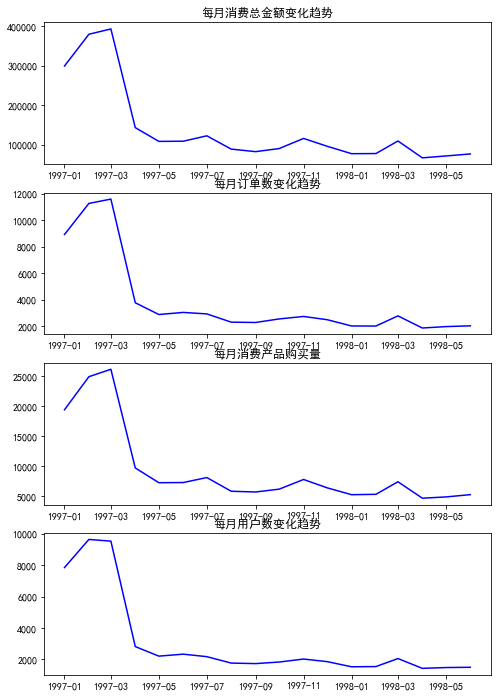

In [9]:
#制定可视化图分析不同维度用户消费趋势
fig = plt.figure(figsize = (8,12))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

# 按月金额数(图1)
ax1.plot(grouped_month.order_amount.sum(),c='blue')
ax1.set_title('每月消费总金额变化趋势')

# 按月的订单数(图2)
ax2.plot(grouped_month.user_id.count(),c='blue')
ax2.set_title('每月订单数变化趋势')

# 按月产品数(图3)
ax3.plot(grouped_month.order_products.sum(),c='blue')
ax3.set_title('每月消费产品购买量')

# 每月用户人数  这里需要去重，有些用户重复购买(图4)
ax4.plot(grouped_month.user_id.apply(lambda x:len(x.drop_duplicates())),c='blue')
ax4.set_title('每月用户数变化趋势')

Text(0.5, 1.0, '每月用户消费的平均金额')

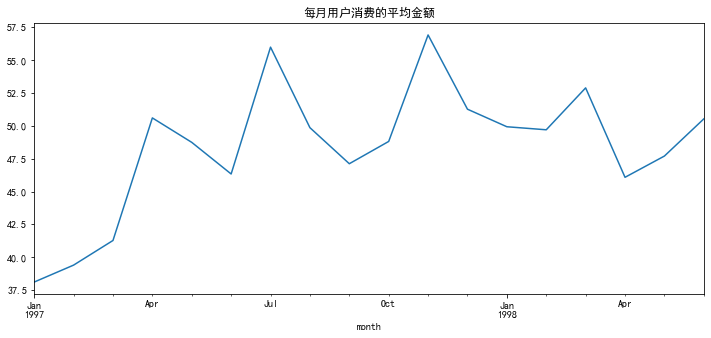

In [29]:
#每月用户消费的平均金额(图5)
((grouped_month.order_amount.sum())/(grouped_month.user_id.apply(lambda x: len(x.drop_duplicates())))).plot(figsize=(12,5))
plt.title('每月用户消费的平均金额')

Text(0.5, 1.0, '每月用户消费的平均次数')

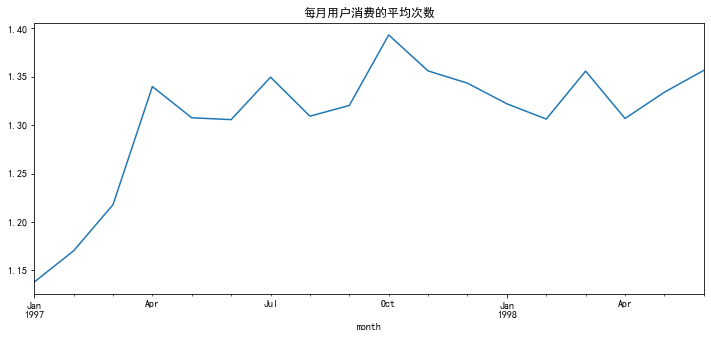

In [30]:
#每月用户消费的平均次数(图6)
((grouped_month.user_id.count())/(grouped_month.user_id.apply(lambda x : len(x.drop_duplicates())))).plot(figsize=(12,5))
plt.title('每月用户消费的平均次数')

**图一：** 消费金额在前三个月达最高峰，后期消费金额较为平稳，有轻微下降趋势

**图二：** 前三个月订单数在10000笔左右，后续月份的订单数在2500左右

**图三：** 产品购买量 呈现早期购买量多 后期下降趋势

**图四：** 每月消费人数小小于每月的消费次数（订单数），但是区别不大，前三个月每月的消费人数在8000-10000之间，后续月份平均2000左右，一样是前期消费人数多，后期平稳下降趋势

出现这种状况，假设问题是出现在用户身上，早期时间段的用户有异常值，或者由于各类促销营销，由于只有消费数据，无法进一步进行判断

**图五:** 前三个月用户平均消费在40元左右，后续月份用户平均消费金额相比前三个月有一些提高，用户平均消费金额在区间[45,57.5]之间

**图六:** 前三个月用户消费的平均次数逐渐增加，后续月份用户的平均消费次数在1.35次左右

In [12]:
#数据透视查看，按月分别对用户购买金额求和，订单数求和，用户人数计数
df.pivot_table(index='month',
                values = ['order_products','order_amount','user_id'],
                aggfunc = {'order_products':'sum',
                           'order_amount':'sum',
                           'user_id':'count'})

,order_amount,order_products,user_id
month,,,
1997-01-01,299060.17,19416,8928
1997-02-01,379590.03,24921,11272
1997-03-01,393155.27,26159,11598
1997-04-01,142824.49,9729,3781
1997-05-01,107933.30,7275,2895
1997-06-01,108395.87,7301,3054
1997-07-01,122078.88,8131,2942
1997-08-01,88367.69,5851,2320
1997-09-01,81948.80,5729,2296


#### 用户个体消费分析

**用户消费金额，消费次数描述统计**

In [13]:
grouped_user = df.groupby('user_id')
grouped_user.sum().describe()

,order_products,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


用户平均购买量7张CD,标准差17，波动比较大，但是中位值只有3，说明小部分用户购买了大量的CD

用户平均消费为106元，中位值为43，也有极值干扰

**用户消费金额和消费次数散点图**

<AxesSubplot:title={'center':'订单散点图'}, xlabel='order_amount', ylabel='order_products'>

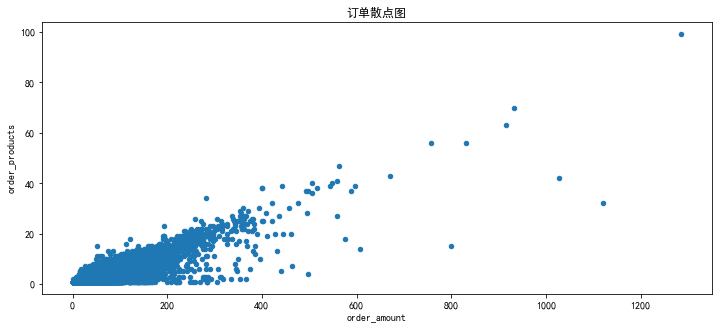

In [31]:
# 每笔订单消费金额与消费商品数的散点图(可考虑做直方图,进一步直观的考察数据的分布情况)
df.plot.scatter(x='order_amount',y='order_products',title='订单散点图',figsize=(12,5))

绘制每笔订单的散点图。从图中观察，订单消费金额和订单商品量呈规律性，订单金额在(0-400)及产品数在(0-40)的订单较多。  
订单的极值较少，超出1000的就几个。

<AxesSubplot:xlabel='order_amount', ylabel='order_products'>

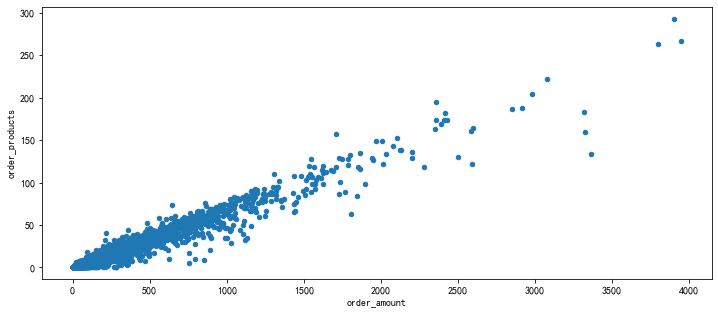

In [32]:
#每位用户的消费金额与消费商品数散点图,并用query过滤掉订单金额大于4000的订单，减小极值干扰
grouped_user.sum().query('order_amount < 4000').plot.scatter(x='order_amount',y='order_products',figsize=(12,5))

绘制用户的散点图，用户也比较健康，而且规律性比订单更强。因为这是CD网站的销售数据，商品比较单一，金额和商品量的关系也  
因此呈线性，没几个离群点。消费能力特别强的用户有，但是数量不多

**用户消费金额的分布图(符合二八法则)**

<AxesSubplot:ylabel='Frequency'>

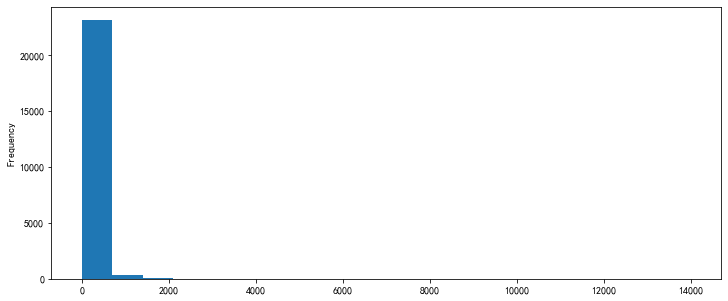

In [33]:
grouped_user.sum().order_amount.plot.hist(bins=20,figsize=(12,5))
# bins=20，就是分成20块，最高金额是14000，每个项就是700

从直方图可知，用户消费金额，绝大部分呈现集中趋势，小部分异常值干扰了判断，可以使用过滤操作排除异常

Text(0.5, 1.0, '消费金额分布图')

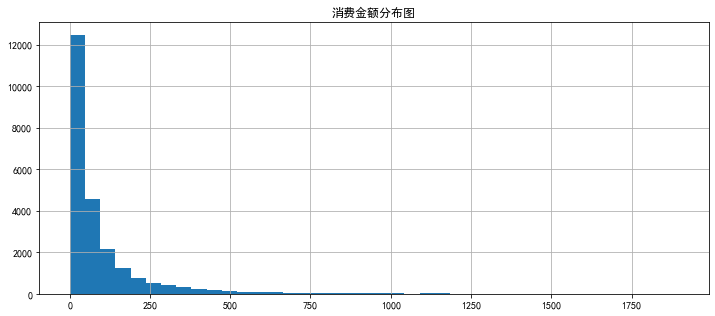

In [34]:
# 过滤掉商品数大于100的订单，减小极值影响
grouped_user.sum().query('order_products<100').order_amount.hist(bins=40,figsize=(12,5))
plt.title('消费金额分布图')

In [18]:
# 计算过滤后数据的描述统计
grouped_user.sum().query('order_products<100').describe()

,order_products,order_amount
count,23491.000000,23491.000000
mean,6.513218,97.293395
std,9.995441,151.923501
min,1.000000,0.000000
25%,1.000000,19.960000
50%,3.000000,43.300000
75%,7.000000,104.945000
max,98.000000,1895.730000


使用切比雪夫定理过滤掉异常值，计算95%的数据的分布情况 95%的数据在[mean-2std,mean+2std]

通过计算可知，95%的消费在区间[0,856.5]元之间

**用户消费次数的分布图**

Text(0.5, 1.0, '消费次数分布图')

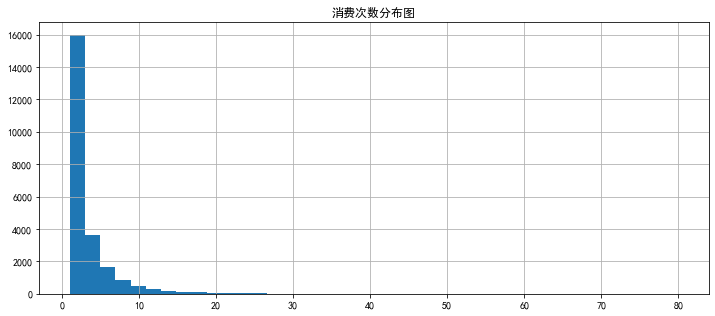

In [35]:
plt.figure(figsize=(12,5))
grouped_user.count().query('order_products<100').order_amount.hist(bins=40,figsize=(12,5))
plt.title('消费次数分布图')

从直方图看，大部分用户的消费能力确实不高，大多数消费为0-10次，高消费用户在图上几乎看不到，这也确实符合消费行为的行业规律，即“二八法则”

下面通过计算累计消费金额和累计消费商品数百分比来分析用户累计消费金额的占比

**用户累计消费金额占比**

Text(0.5, 1.0, '消费商品数累计百分比')

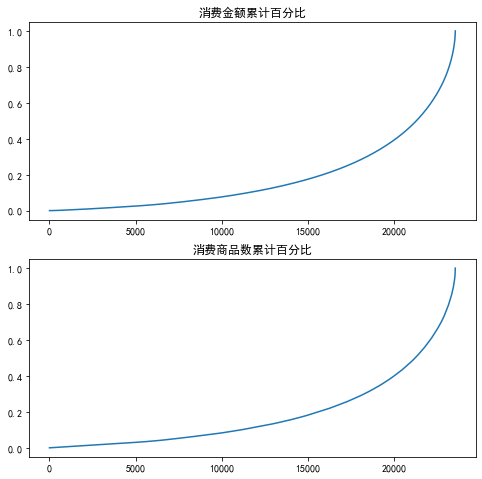

In [20]:
#按ID分组,并求和,再对订单金额进行排序(默认从小到大),最后通过匿名函数对每一行进行累计求和占比
user_cumsum=grouped_user.sum().sort_values('order_amount').apply(lambda x: x.cumsum()/x.sum())
plt.subplot(211)
user_cumsum.reset_index().order_amount.plot(figsize=(8,8))
plt.title('消费金额累计百分比')
plt.subplot(212)
user_cumsum.reset_index().order_products.plot()
plt.title('消费商品数累计百分比')

In [21]:
len(user_cumsum.query('order_products>=0.2'))

7945

In [22]:
len(user_cumsum.query('order_amount>=0.2'))

7695

由上图可知，7695位用户贡献了消费额的80%，即32%的用户贡献了80%的消费金额

同样地，7945位用户贡献了消费商品数量的80%，即34%的用户贡献了消费商品数的80%

该结果符合消费行业规律——“二八法则”

#### 用户消费行为分析

**第一次购买时间分布**

<AxesSubplot:>

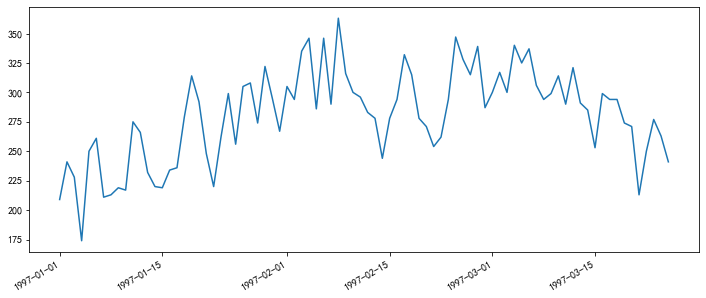

In [23]:
# 计算第一次购买时间分布
df['order_dt'].groupby(df['user_id']).min().value_counts().plot(figsize=(12,5))
#等同于grouped_user.min().order_dt.value_counts().plot(figsize=(12,5))
# 2月发生较大下跌  渠道发生变化，或者其他  可以做一些假设

In [26]:
#按月统计购买次数
grouped_user.min().month.value_counts()

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

用户第一次购买分布，集中在前三个月，其中2月11日至2月25日有一次剧烈波动

Text(0.5, 1.0, '最后一次消费时间分布')

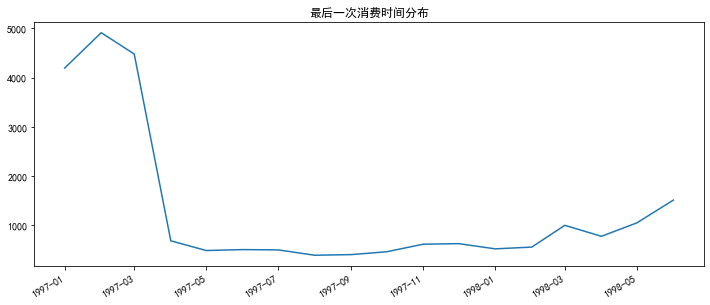

In [28]:
grouped_user.max().month.value_counts().plot(figsize=(12,5))
plt.title('最后一次消费时间分布')

用户最后一次购买的分布比第一次购买分布广

大部分最后一次购买在前三个月，说明很多用户购买一次后就不再进行购买

随着时间递增，最后一次购买数在递增，消费呈线性流失上升的情况

**新老客户消费比**

**a.多少用户只消费一次**

In [44]:
# 计算只消费了一次的用户人数(结果为:11908)
one_consumed=grouped_user.count().query('order_dt==1').order_dt.count()
# 计算总的消费人数(结果为:23570)
all_consumed=grouped_user.count().order_dt.count()
#计算多少用户只消费一次
one_consumed/all_consumed

0.5052184980907933

由上可知，有一半的用户只消费了一次

**b.计算每月新客占比并作出其百分比折线图：**

Text(0.5, 1.0, '新客占比百分比')

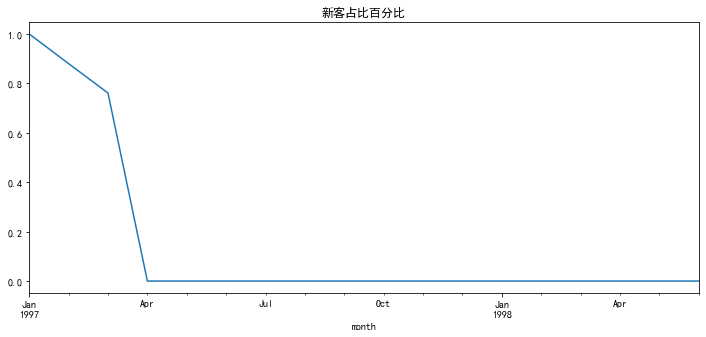

In [45]:
# 按月份和用户ID分组
grouped_month_user=df.groupby(['month','user_id'])
# 用当月用户订单日期最小值与用户订单日期最小值联结
tmp=grouped_month_user.order_dt.agg(['min']).join(grouped_user.order_dt.min())
# 判断用户当月订单日期最小值是否与用户订单日期最小值相等，新建字段new,new代表老客户
tmp['new']=(tmp['min']==tmp.order_dt)
# 重置索引列,并按月分组,作新客占比折线图
tmp.reset_index().groupby('month').new.apply(lambda x: x.sum()/x.count()).plot(figsize=(12,5))
plt.title('新客占比百分比')

可以看出，只有前三个月的新客占比不为零，后续月份新客占比百分比为零，这说明只有前三个月有新用户的增加，

后续月份消费的用户是前三个月加入的老客户，并没有新客户的加入

### 用户分层

**RFM模型**

In [57]:
#  RFM  
rfm = df.pivot_table(index = 'user_id',
                     values = ['order_products','order_amount','order_dt'],
                     aggfunc = {'order_dt':'max',
                                'order_amount':'sum',
                                'order_products':'sum'})
rfm.head()

,order_amount,order_dt,order_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29


**R：** 消费最后一次消费时间的度量，数值越小越好

**F：** 消费的总商品数，数值越大越好

**M：** 消费的总金额，数值越大越好

In [64]:
# 计算每位用户最后一次消费时间与全部用户最后一次消费时间的差值
rfm['R']=-(rfm.order_dt-rfm.order_dt.max())/np.timedelta64(1,'D')
rfm.rename(columns={'order_products':'F','order_amount':'M'},inplace=True)
rfm.head()

,M,order_dt,F,R
user_id,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,6,534.0
3,156.46,1998-05-28,16,33.0
4,100.50,1997-12-12,7,200.0
5,385.61,1998-01-03,29,178.0


In [65]:
#应用匿名函数,判断每一行值与平均值大小关系
rfm[['R','F','M']].apply(lambda x:x-x.mean()).head()

,R,F,M
user_id,,,
1,177.778362,-6.122656,-94.310426
2,166.778362,-1.122656,-17.080426
3,-334.221638,8.877344,50.379574
4,-167.221638,-0.122656,-5.580426
5,-189.221638,21.877344,279.529574


In [70]:
# 客户层次的定义,RFM得分可根据业务定义打分,也可以通过K-means聚类模型,得出不同相似程度的数据集,并且根据每一个数据集的特点进行客户定义
def rfm_func(x):
    level = x.apply(lambda x:'1' if x>= 0 else '0')
# 字符串拼接
# 111，R>0,是距离平均消费时间要久，R越大 说明没有消费时间越久  ，F >0 M>0,消费次数和金额也是较高的，重要价值客户，依次类推
    label = level.R + level.F + level.M
    d = {
        '111':'重要价值客户', 
        '011':'重要保持客户',
        '101':'重要挽留客户',
        '001':'重要发展客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般挽留客户',
        '000':'一般发展客户'
    }
    result = d[label]
    return result
# x - x.mean() （具体真实情况可以修改，不一定需要用均值）   切比雪夫也可以 > 200 极值人工处理掉
rfm['label'] = rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1)
rfm.head()

,M,order_dt,F,R,label
user_id,,,,,
1,11.77,1997-01-01,1,545.0,一般挽留客户
2,89.00,1997-01-12,6,534.0,一般挽留客户
3,156.46,1998-05-28,16,33.0,重要保持客户
4,100.50,1997-12-12,7,200.0,一般发展客户
5,385.61,1998-01-03,29,178.0,重要保持客户


In [71]:
# 计算每层客户R、F、M的和
rfm.groupby('label').sum()

,M,F,R
label,,,
一般价值客户,7181.28,650,36295.0
一般保持客户,19937.45,1712,29448.0
一般发展客户,196971.23,13977,591108.0
一般挽留客户,438291.81,29346,6951815.0
重要价值客户,167080.83,11121,358363.0
重要保持客户,1592039.62,107789,517267.0
重要发展客户,45785.01,2023,56636.0
重要挽留客户,33028.40,1263,114482.0


可以看出，重要保持客户对于消费总金额的占比远大于其他客户的占比，这说明绝大部分收益是由重要保持客户贡献的，

只要能保证这部分客户不流失和增加，那么公司收益将得到有力保障

In [72]:
rfm.groupby('label').count()

,M,order_dt,F,R
label,,,,
一般价值客户,77,77,77,77
一般保持客户,206,206,206,206
一般发展客户,3300,3300,3300,3300
一般挽留客户,14074,14074,14074,14074
重要价值客户,787,787,787,787
重要保持客户,4554,4554,4554,4554
重要发展客户,331,331,331,331
重要挽留客户,241,241,241,241


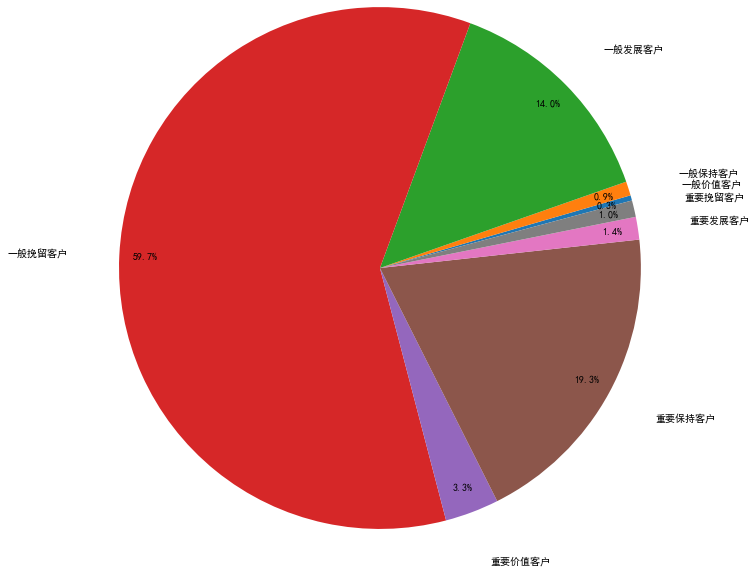

In [74]:
# 各类类型用户占比
use_c = rfm.groupby('label').count()
plt.axis('equal')
labels = ['一般价值客户','一般保持客户','一般发展客户','一般挽留客户','重要价值客户','重要保持客户','重要发展客户','重要挽留客户']
plt.pie(use_c['M'],
       autopct='%3.1f%%',
        labels = labels,
        pctdistance=0.9,
       labeldistance = 1.2,
       radius=3,
       startangle = 15)
plt.show()

实现了对用户的分层 ,重要保持客户的总消费金额达到159万，重要保持客户的人数达到了4554人

从RFM分层可知，能带来中坚收益的用户为重要保持客户，但是这是由于极值的影响，所以RFM的划分应该以业务微赚

尽量用小部分的用户覆盖大部分的额度

不要为了数据好看划分等级

极值会拉均值

根据数据可以和业务相结合，如何提升一些重要的指标


**用户状态分层**

In [77]:
pivoted_counts = df.pivot_table(index = 'user_id',
                                  columns = 'month',
                                  values = 'order_dt',
                                  aggfunc = 'count').fillna(0)
# pivoted_counts.head()
pivoted_counts.head()
# 按月份进行对比，1月份哪些是购买的，再去对比二月份哪些是购买的

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [79]:
#消费过的为1 ，没消费过的为0
data_purchase = pivoted_counts.applymap(lambda x: 1 if x > 0 else 0)

将用户状态分为unreg（未注册）、new（新客）、active（活跃用户）return（回流用户）和unactive（不活跃用户)

编写思路:

若本月没有消费

    若之前是未注册，则依旧为未注册
    若之前有消费，则为流失/不活跃
    其他情况，为未注册
    
若本月有消费  

    若是第一次消费，则为新用户  
    若之前有过消费，则上个月为不活跃，则为回流  
    若上个月为未注册，则为新用户  
    除此之外，为活跃  

In [80]:
#用户状态
def active_status(data):
    status = []
    for i in range(18):
        
        #若本月没有消费
        if data[i] == 0:
            if len(status) > 0:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')                  
        #若本月消费
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
# 这里需要对返回的值进行转换，将列表转为Series
    return pd.Series(status, index = pivoted_counts.columns)

In [82]:
purchase_stats = data_purchase.apply(active_status,axis=1)
purchase_stats.head()
# 未注册不希望参与处理 设置为空值

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


In [85]:
purchase_status_ct = purchase_stats.replace('unreg',np.NaN).apply(lambda x : pd.value_counts(x))
purchase_status_ct

#将上面透视表转置
purchase_status_ct.fillna(0).T.head()

,active,new,return,unactive
month,,,,
1997-01-01,0.0,7846.0,0.0,0.0
1997-02-01,1157.0,8476.0,0.0,6689.0
1997-03-01,1681.0,7248.0,595.0,14046.0
1997-04-01,1773.0,0.0,1049.0,20748.0
1997-05-01,852.0,0.0,1362.0,21356.0


Text(0.5, 1.0, '用户分层')

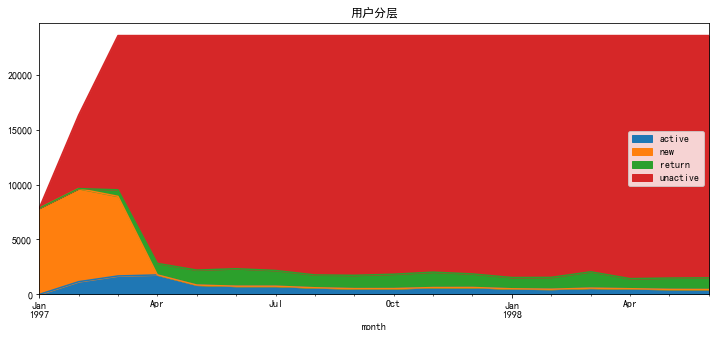

In [86]:
#作用户状态分层面积图
purchase_stats_ct=purchase_status_ct.fillna(0).T
purchase_stats_ct.plot.area(figsize=(12,5))
plt.title('用户分层')

由上可知不同客户活跃状态,根据业务需求采取不同的运营策略,如拉新,引流,促活,召回等

**用户购买周期(按订单)**

In [90]:
#计算用户相邻订单日期的差值,其中shift()函数是指将数据进行移动,默认axis=0
order_diff=grouped_user.apply(lambda x: x.order_dt-x.order_dt.shift())  
order_diff.head(10)

user_id   
1        0        NaT
2        1        NaT
         2     0 days
3        3        NaT
         4    87 days
         5     3 days
         6   227 days
         7    10 days
         8   184 days
4        9        NaT
Name: order_dt, dtype: timedelta64[ns]

In [88]:
order_diff.describe()

count                         46089
mean     68 days 23:22:13.567662566
std      91 days 00:47:33.924168893
min                 0 days 00:00:00
25%                10 days 00:00:00
50%                31 days 00:00:00
75%                89 days 00:00:00
max               533 days 00:00:00
Name: order_dt, dtype: object

Text(0.5, 1.0, '用户消费周期分布')

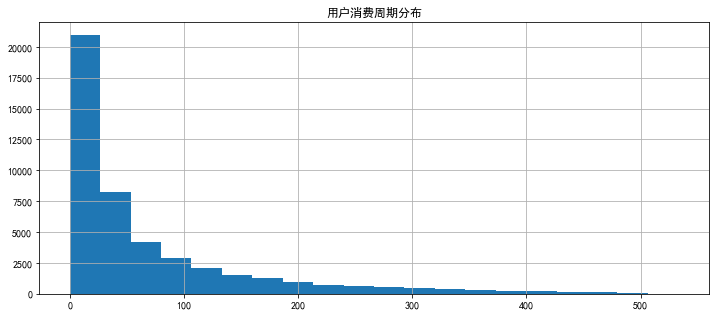

In [91]:
#作用户消费周期分布：
(order_diff/np.timedelta64(1,'D')).hist(bins=20,figsize=(12,5))
plt.title('用户消费周期分布')

从用户购买周期的均值中可以看出，平均消费周期为68天，中位数是31天，可以根据用户的购买周期对用户进行定期召回。

依然是用图来更直观的看一下消费周期的分布：基本用户的消费周期都集中在100天以下，平均消费周期就一个月。

Text(0.5, 1.0, '用户生命周期分布')

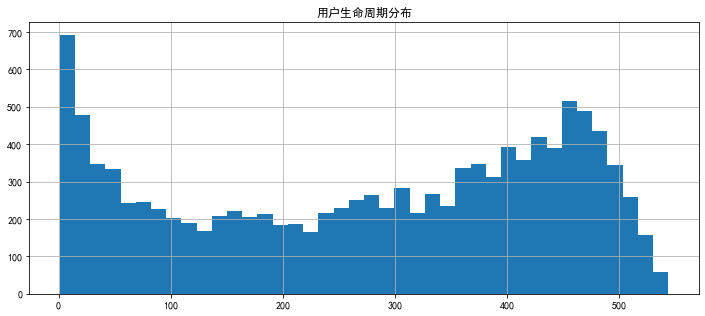

In [93]:
#usertime_diff代表用户消费首次订单与最后一次订单间隔时间
usertime_diff=df['order_dt'].groupby(df['user_id']).max()-df['order_dt'].groupby(df['user_id']).min()
usertime_diff=usertime_diff.reset_index()
usertime_diff=usertime_diff['order_dt']/np.timedelta64(1,'D')
usertime_diff[usertime_diff>0].hist(bins=40,figsize=(12,5))
plt.title('用户生命周期分布')

这是双峰趋势图。部分质量差的用户，虽然消费了两次，但是仍旧无法持续，在用户首次消费30天内应该尽量引导。少部分用户集中在50天～300天，属于

普通型的生命周期，高质量用户的生命周期，集中在400天以后，这已经属于忠诚用户了

In [96]:
usertime_diff[usertime_diff>0].mean()

276.0448072247308

消费两次以上的用户生命周期是276天，远高于总体。从策略看，用户首次消费后应该花费更多的引导

其进行多次消费，提供生命周期，这会带来2.5倍的增量。

### 复购率和回购率分析

**复购率:** 自然月内，购买多次的用户占比

**回购率:** 曾今购买过的用户在某一时期内的再次购买占比

注:指标的定义和标准是根据不同公司的业务形态而变化

**复购率**

In [97]:
# 作透视表，计算客户每个月的消费次数
pivoted_counts=df.pivot_table(index='user_id',
                              columns='month',
                              values='order_dt',
                              aggfunc='count').fillna(0)
pivoted_counts.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


以上透视表记录了每位用户每月消费次数的记录，是一份消费明细表

In [98]:
# 购买大于1次的 赋值为1 ，然后小于等于1 的 如果是购买次数是0，则赋值为空，否则 就是购买一次，赋值为0
purchase_r = pivoted_counts.applymap(lambda x: 1 if x > 1 else np.NaN if x == 0 else 0)
purchase_r.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, '复购率')

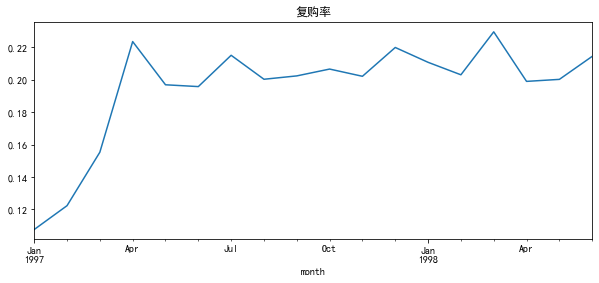

In [99]:
#计算复购率
(purchase_r.sum()/purchase_r.count()).plot(figsize=(10,4))
plt.title('复购率')

复购率稳定在20%左右，前三个月因为有大量新用户涌入，而这些用户只购买了一次，所以导致复购率降低，后续月份用

户数量比较稳定，所以复购率也稳定在21%左右，即后续月份每月有大概21%的用户会在一个月内消费两次以上回购率

In [101]:
# 回购率 只需要0  1 代表
data_purchase.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [104]:
#定义一个函数，将消费两次以上记为1，消费一次记为0，没有消费记为空值：
def purchase_back(data):
    status = []
    for i in range(17):
        if data[i] == 1: # 本月进行过消费
            if data[i+1] == 1: # 下一月是否进行消费
                status.append(1) #消费为1 回购了
            if data[i+1] == 0:
                status.append(0) # 未消费则为0 没有回购
        else:
            status.append(np.NaN) # 之前没消费则不计
    status.append(np.NaN) # 最后一个月没有判断需要补上
    return pd.Series(status,data_purchase.columns)
#对透视表应用函数purchase_back:
purchase_b = data_purchase.apply(purchase_back, axis =1)
purchase_b.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, '回购率')

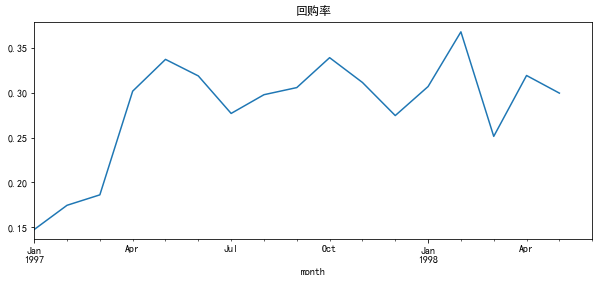

In [105]:
#计算回购率:
(purchase_b.sum()/purchase_b.count()).plot(figsize=(10,4))
plt.title('回购率')

0 表示上个月购买了，下个月没有进行消费，则是没有回购 ，

1代表当月消费过次月依旧消费，表示回购了

NAN表示当月没有消费（不进行计算）

前三个月因为有大量的新用户涌入，但是超过一半的人只消费了一次，所以前三个月回购率

比较低，后续月份用户人数比较稳定，回购率也比较稳定，稳定在30%左右，即当月消费人数

中有30%左右的用户会在下一个月再次消费